Loading , Visualizing and describing the data 

In [1]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:

shapefile_path = "Datasets\\Country\\Country.shp"

country_gdf = gpd.read_file(shapefile_path, encoding='utf-8')


print("Country Data:")
print(country_gdf.info())
print(country_gdf.head())


Country Data:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27272 entries, 0 to 27271
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        27272 non-null  float64 
 1   PERIMETER   27272 non-null  float64 
 2   CNT1M_1_    27272 non-null  int64   
 3   CNT1M_1_ID  27272 non-null  int64   
 4   FAO_NAME    27272 non-null  object  
 5   FAO_CODE    27272 non-null  int32   
 6   UN_CODE     27272 non-null  int32   
 7   ISO_CODE    27270 non-null  object  
 8   CNTRY_NAME  27272 non-null  object  
 9   ISO3_CODE   27272 non-null  object  
 10  geometry    27272 non-null  geometry
dtypes: float64(2), geometry(1), int32(2), int64(2), object(4)
memory usage: 2.1+ MB
None
         AREA   PERIMETER  CNT1M_1_  CNT1M_1_ID   FAO_NAME  FAO_CODE  UN_CODE  \
0  649.422101  900.013634         2           1  Greenland        85      304   
1    0.002037    0.262890         3           2  Greenland        85   

In [3]:
algeria_gdf = country_gdf[country_gdf['FAO_NAME'] == "Algeria"]
algeria_gdf

,AREA,PERIMETER,CNT1M_1_,CNT1M_1_ID,FAO_NAME,FAO_CODE,UN_CODE,ISO_CODE,CNTRY_NAME,ISO3_CODE,geometry
12822,213.434727,73.435570,12824,11914,Algeria,4,12,DZ,Algeria,DZA,"POLYGON ((7.51832 37.03624, 7.52736 37.02525, ..."
13013,0.000072,0.033402,13015,11939,Algeria,4,12,DZ,Algeria,DZA,"POLYGON ((-0.89577 35.77688, -0.89942 35.77692..."
13017,0.000111,0.044937,13019,11942,Algeria,4,12,DZ,Algeria,DZA,"POLYGON ((-1.13231 35.72762, -1.13595 35.72835..."


In [4]:

soil_data_path = "Datasets\\soil_dz_allprops.xlsx"


soil_df = pd.read_excel(soil_data_path)


print("Soil Data:")
print(len(soil_df))
print(soil_df.info())
print(soil_df.head())


Soil Data:
295
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CNT_FULLNAME      295 non-null    object 
 1   sand % topsoil    295 non-null    float64
 2   sand % subsoil    295 non-null    float64
 3   silt % topsoil    295 non-null    float64
 4   silt% subsoil     295 non-null    float64
 5   clay % topsoil    295 non-null    float64
 6   clay % subsoil    295 non-null    float64
 7   pH water topsoil  295 non-null    float64
 8   pH water subsoil  295 non-null    float64
 9   OC % topsoil      295 non-null    float64
 10  OC % subsoil      295 non-null    float64
 11  N % topsoil       295 non-null    float64
 12  N % subsoil       295 non-null    float64
 13  BS % topsoil      295 non-null    float64
 14  BS % subsoil      295 non-null    float64
 15  CEC topsoil       295 non-null    float64
 16  CEC subsoil       295 non-nul

In [5]:
def is_valid_wkt(wkt_str):
    return isinstance(wkt_str, str) and wkt_str.startswith('POLYGON') and wkt_str.endswith(')')


def clean_wkt_load(wkt_str):
    if not is_valid_wkt(wkt_str):
        print(f"Invalid WKT format: {wkt_str}")
        return None  

    try:
        geom = wkt.loads(wkt_str)
        
        if geom.is_valid:
            return geom
        else:
            print(f"Invalid geometry found, attempting to fix: {wkt_str}")
            fixed_geom = geom.buffer(0)
            if fixed_geom.is_valid:
                return fixed_geom
            else:
                print(f"Could not fix geometry: {wkt_str}")
                return None
    except Exception as e:
        print(f"Error loading geometry: {e} for string: {wkt_str}")
        return None  


soil_df['geometry'] = soil_df['geometry'].apply(clean_wkt_load)


soil_df = soil_df[soil_df['geometry'].notnull()]


soil_gdf = gpd.GeoDataFrame(soil_df, geometry='geometry')



Invalid WKT format: POLYGON ((5.980269908905029 34.56650161743164, 5.9806599617004395 34.56270980834961, 5.991310119628906 34.5434684753418, 6.001669883728027 34.49327850341797, 5.9951300621032715 34.47127151489258, 5.9852800369262695 34.43404006958008, 5.977729797363281 34.39255905151367, 5.988339900970459 34.250099182128906, 5.987060070037842 34.188560485839844, 5.983059883117676 34.18827819824219, 5.943850040435791 34.137428283691406, 5.88778018951416 34.12255859375, 5.782830238342285 34.107120513916016, 5.748340129852295 34.08375930786133, 5.702169895172119 34.02193832397461, 5.685259819030762 33.98979187011719, 5.6882100105285645 33.96617889404297, 5.7263898849487305 33.88452911376953, 5.735680103302002 33.878028869628906, 5.75629997253418 33.804901123046875, 5.777070045471191 33.768680572509766, 5.784969806671143 33.74674987792969, 5.793479919433594 33.73598098754883, 5.8030500411987305 33.685630798339844, 5.797989845275879 33.661441802978516, 5.767859935760498 33.60118865966797,

In [6]:
dataset_description = {}
dataset_description["Rows Number"] = soil_gdf.shape[0]
dataset_description["Columns Number"] = soil_gdf.shape[1]
dataset_description["Usage of memory"] = str(soil_gdf.memory_usage(index=False).sum() / 1024) + " ko"
dataset_description["Data types"] = list(map(str, soil_gdf.dtypes.unique().tolist()))
pd.DataFrame.from_dict(dataset_description, orient='index', columns = [""])

,
Rows Number,291
Columns Number,26
Usage of memory,59.109375 ko
Data types,"[object, float64, geometry]"


In [7]:
colonnes_description = []
for d in soil_gdf:
    colonnes_description.append([d, soil_gdf[d].count(), str(soil_gdf.dtypes[d])])
pd.DataFrame(colonnes_description, columns = ["Name","Values not null","Type"])

,Name,Values not null,Type
0,CNT_FULLNAME,291,object
1,sand % topsoil,291,float64
2,sand % subsoil,291,float64
3,silt % topsoil,291,float64
4,silt% subsoil,291,float64
5,clay % topsoil,291,float64
6,clay % subsoil,291,float64
7,pH water topsoil,291,float64
8,pH water subsoil,291,float64
9,OC % topsoil,291,float64


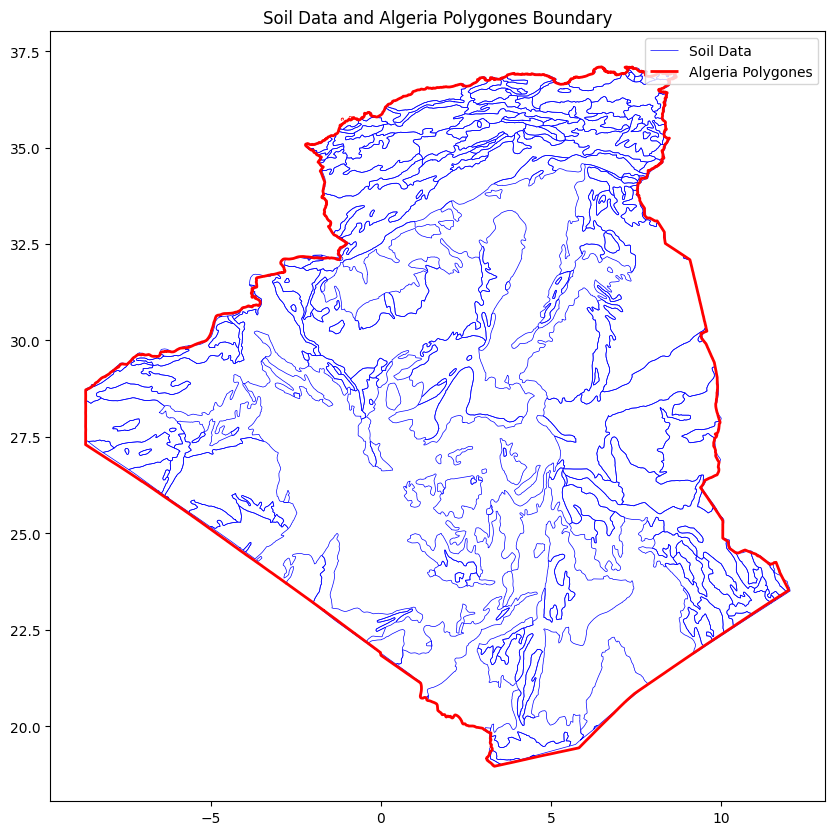

In [8]:
import matplotlib.pyplot as plt

# Plotting the original soil data and Algeria area
fig, ax = plt.subplots(figsize=(10, 10))
soil_gdf.boundary.plot(ax=ax, color='blue', linewidth=0.5, label='Soil Data')
algeria_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Algeria Polygones')
plt.legend()
plt.title("Soil Data and Algeria Polygones Boundary")
plt.show()


In [12]:
import xarray as xr
import rioxarray
import dask
import geopandas as gpd
from shapely.geometry import Point
import os

# Seting the path for climate data files and country shapefile
nc_folder_path = "Datasets/Climate-DATA/"


# Select only the largest polygon (mainland Algeria)
#mainland_algeria = algeria_gdf.geometry.iloc[0]

# Step 1: Loading climate data with Dask and set up spatial dimensions
climate_ds = xr.open_mfdataset(os.path.join(nc_folder_path, "*.nc"), 
                               combine='by_coords', 
                               parallel=True, 
                               engine='netcdf4')

# Step 2: Set spatial dimensions and CRS for Dask array and clip
climate_ds = climate_ds.rio.set_spatial_dims(x_dim='lon', y_dim='lat')
climate_ds = climate_ds.rio.write_crs(algeria_gdf.crs)

# Clip the climate data to only the mainland Algeria bounds
#climate_ds_algeria = climate_ds.rio.clip_box(*mainland_algeria.bounds)

climate_ds_algeria = climate_ds.rio.clip([algeria_gdf.unary_union], crs=algeria_gdf.crs, drop=True)



C:\Users\Dell\AppData\Local\Temp\ipykernel_10272\1952885384.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  climate_ds_algeria = climate_ds.rio.clip([algeria_gdf.unary_union], crs=algeria_gdf.crs, drop=True)


In [13]:
df_climate = climate_ds_algeria.to_dataframe().reset_index()
df_climate['geometry'] = [Point(xy) for xy in zip(df_climate['lon'], df_climate['lat'])]
gdf_climate = gpd.GeoDataFrame(df_climate, geometry='geometry')
gdf_climate = gdf_climate.set_crs(algeria_gdf.crs, allow_override=True)


In [14]:
dataset_description = {}
dataset_description["Rows Number"] = gdf_climate.shape[0]
dataset_description["Columns Number"] = gdf_climate.shape[1]
dataset_description["Usage of memory"] = str(gdf_climate.memory_usage(index=False).sum() / 1024) + " ko"
dataset_description["Data types"] = list(map(str, gdf_climate.dtypes.unique().tolist()))
pd.DataFrame.from_dict(dataset_description, orient='index', columns = [""])

,
Rows Number,12929760
Columns Number,11
Usage of memory,757603.125 ko
Data types,"[datetime64[ns], float64, int32, float32, geom..."


In [15]:
colonnes_description = []
for d in gdf_climate:
    colonnes_description.append([d, gdf_climate[d].count(), str(gdf_climate.dtypes[d])])
pd.DataFrame(colonnes_description, columns = ["Name","Values not null","Type"])

,Name,Values not null,Type
0,time,12929760,datetime64[ns]
1,lon,12929760,float64
2,lat,12929760,float64
3,spatial_ref,12929760,int32
4,PSurf,7498560,float32
5,Qair,7498560,float32
6,Rainf,7498560,float32
7,Snowf,7498560,float32
8,Tair,7498560,float32
9,Wind,7498560,float32


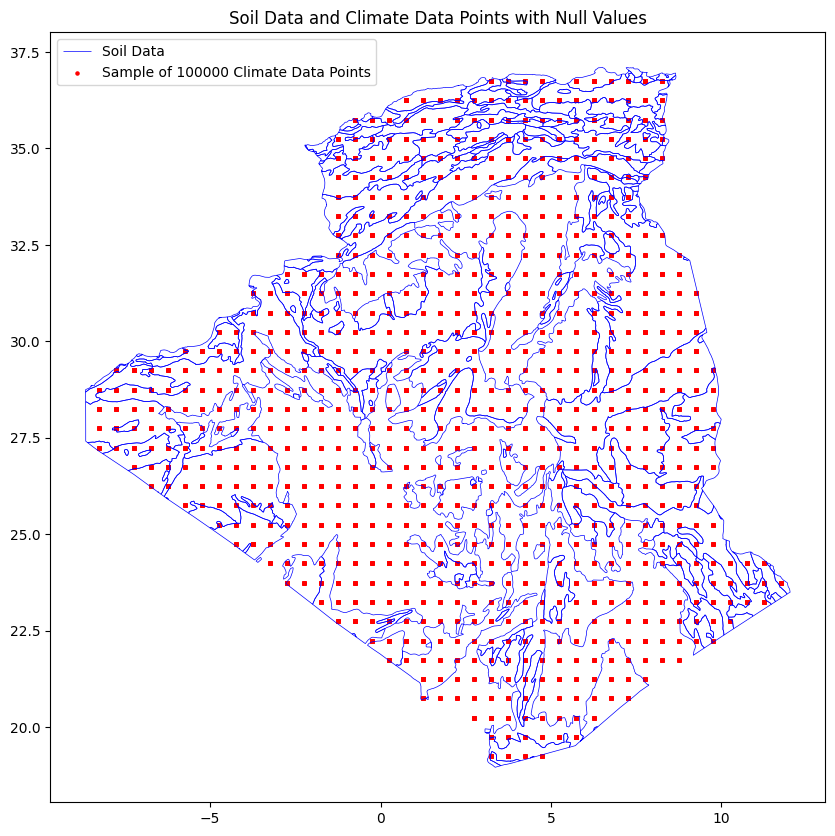

In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
#import itertools


sample_size = 100000  
gdf_climate_sample = gdf_climate.dropna(subset=['Tair', 'Qair', 'Rainf', 'Wind', 'PSurf', 'Snowf']).sample(n=sample_size, random_state=1)

# Convert valid sample points and null points to GeoSeries for plotting
coordinates_sample = [Point(coord) for coord in zip(gdf_climate_sample['lon'], gdf_climate_sample['lat'])]
points_gs_sample = gpd.GeoSeries(coordinates_sample, crs="EPSG:4326")



# Step 3: Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the soil data boundary
soil_gdf.boundary.plot(ax=ax, color='blue', linewidth=0.5, label='Soil Data')

# Plot sampled climate data points (valid data points)
points_gs_sample.plot(ax=ax, color='red', markersize=5, label=f'Sample of {sample_size} Climate Data Points')

# Add title and legend
plt.legend()
plt.title("Soil Data and Climate Data Points")
plt.show()


In [16]:
print(gdf_climate.head())
print(soil_gdf.head())

        time   lon    lat  spatial_ref  PSurf  Qair  Rainf  Snowf  Tair  Wind  \
0 2019-01-01 -8.25  19.25            0    NaN   NaN    NaN    NaN   NaN   NaN   
1 2019-01-01 -8.25  19.75            0    NaN   NaN    NaN    NaN   NaN   NaN   
2 2019-01-01 -8.25  20.25            0    NaN   NaN    NaN    NaN   NaN   NaN   
3 2019-01-01 -8.25  20.75            0    NaN   NaN    NaN    NaN   NaN   NaN   
4 2019-01-01 -8.25  21.25            0    NaN   NaN    NaN    NaN   NaN   NaN   

              geometry  
0  POINT (-8.25 19.25)  
1  POINT (-8.25 19.75)  
2  POINT (-8.25 20.25)  
3  POINT (-8.25 20.75)  
4  POINT (-8.25 21.25)  
  CNT_FULLNAME  sand % topsoil  sand % subsoil  silt % topsoil  silt% subsoil  \
0      ALGERIA           49.57           43.09          28.200         24.200   
1      ALGERIA           56.97           55.06          21.440         19.190   
2      ALGERIA           57.39           55.21          24.315         22.825   
3      ALGERIA           20.41         

In [17]:
df_climate.to_csv("final_climate_data.csv", index=False)

gdf_climate.to_file("final_climate_data.gpkg", driver="GPKG")

soil_gdf.to_file("soil_data.gpkg", driver="GPKG")

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


Calculating diffrent tendecies and qurtiles , ploting histograms and box plots 

In [2]:
import numpy as np 

In [3]:
def median(column_values):
    
    sorted_values = sorted(column_values) 

  
    n = len(sorted_values)
   
    if n % 2 == 1:
        median = sorted_values[n // 2]

    else:
        mid1 = sorted_values[n // 2 - 1]
        mid2 = sorted_values[n // 2]
        median = (mid1 + mid2) / 2
    
    return median

In [4]:
def mode(df, attribute):
    # Drop NaN values
    values = df[attribute].dropna()
    
    # Dictionary to store the frequency of each value
    frequency_dict = {}
    
    # Iterate over the values and count frequencies
    for value in values:
        if value in frequency_dict:
            frequency_dict[value] += 1
        else:
            frequency_dict[value] = 1
    
    # Find the maximum frequency
    max_count = max(frequency_dict.values())
    
    # Collect all values that have the maximum frequency
    most_frequent_values = [value for value, count in frequency_dict.items() if count == max_count]
    
    return most_frequent_values

In [5]:
def calculate_tendencies(df, attribute):

    attribute_values = pd.to_numeric(df[attribute], errors='coerce').dropna()

    if np.issubdtype(attribute_values.dtype, np.number):

        return [attribute_values.mean(),median(attribute_values),mode(df,attribute)]
    else:

        return mode(df,attribute)

In [6]:
def outliers(df, attribute):
    
    # Drop NaN values
    values =  pd.to_numeric(df[attribute], errors='coerce').dropna()

    sorted_values = sorted(values) 

    Q1 = np.percentile(sorted_values, 25)

    Q3 = np.percentile(sorted_values, 75)

    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[attribute] < lower_bound) | (df[attribute] > upper_bound)]

    return [Q1, Q3, IQR, outliers]

In [7]:
def missing_unique_values(df, attribute):
    total_missing = df[attribute].isna().sum()
    unique_values = df[attribute].nunique()
    return total_missing, unique_values

In [ ]:
def histogram(attribute_name, attribute_values, ax=None, bins=20, color='teal', marker='o', line_style='-', marker_size=5, save_folder=None):
   
    cleaned_values = attribute_values[~pd.isna(attribute_values)]
    counts, bin_edges = np.histogram(cleaned_values, bins=bins)

   
    ax.plot(bin_edges[:-1], counts, marker=marker, linestyle=line_style, color=color, markersize=marker_size)
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f"{attribute_name} Histogram", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

   
    if save_folder:
        fig_save, ax_save = plt.subplots(figsize=(5, 3))  
        ax_save.plot(bin_edges[:-1], counts, marker=marker, linestyle=line_style, color=color, markersize=marker_size)
        ax_save.set_xlabel('Values', fontsize=10)
        ax_save.set_ylabel('Frequency', fontsize=10)
        ax_save.set_title(f"{attribute_name} Histogram", fontsize=12)
        ax_save.grid(True, linestyle='--', alpha=0.6)

        
        safe_attribute_name = attribute_name.replace("/", "_")
        save_path = os.path.join(save_folder, f"{safe_attribute_name}_histogram.png")
        fig_save.savefig(save_path, format='png', dpi=300)
        plt.close(fig_save)

In [39]:
def generate_box_plot(data, attribute_name, ax=None, show_outliers=True, save_folder=None):
    # Remove NaN values from the data
    cleaned_data = data.dropna()

    
    cleaned_data = np.array(cleaned_data)

    # Create the main figure and axes for the box plot
    
    fig_save, ax_save = plt.subplots(figsize=(5, 3))  # For saving the figure

    # Generate the box plot for display
    if show_outliers:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name], showfliers=False)

    # Set the title and display grid for the notebook plot
    ax.set_title(f'Box Plot for {attribute_name}')
    ax.grid(True)

    # Generate the box plot for saving
    if show_outliers:
        ax_save.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        ax_save.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name], showfliers=False)

    # Set the title and display grid for the saved plot
    ax_save.set_title(f'Box Plot for {attribute_name}')
    ax_save.grid(True)

    if save_folder:
        safe_attribute_name = attribute_name.replace("/", "_")  # Replace "/" with "_" for filename
        save_path = os.path.join(save_folder, f"{safe_attribute_name}_box_plot.png")
        fig_save.savefig(save_path, format='png', dpi=300)
        plt.close(fig_save)  # Close the save figure to free up memory



In [30]:
def bar_chart(attribute_name, attribute_values, ax=None, bins=20, color='teal', edgecolor='k', save_folder=None):
    # Clean the values, remove NaNs
    cleaned_values = attribute_values[~pd.isna(attribute_values)]
    
    # Plot the histogram (bar chart)
    ax.hist(cleaned_values, bins=bins, edgecolor=edgecolor, color=color, alpha=0.75)
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f"{attribute_name} Bar Chart", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Save the figure if save_folder is specified
    if save_folder:
        fig_save, ax_save = plt.subplots(figsize=(5, 3))  
        ax_save.hist(cleaned_values, bins=bins, edgecolor=edgecolor, color=color, alpha=0.75)
        ax_save.set_xlabel('Values', fontsize=10)
        ax_save.set_ylabel('Frequency', fontsize=10)
        ax_save.set_title(f"{attribute_name} Bar Chart", fontsize=12)
        ax_save.grid(True, linestyle='--', alpha=0.6)

        # Create safe filename
        safe_attribute_name = attribute_name.replace("/", "_")
        save_path = os.path.join(save_folder, f"{safe_attribute_name}_bar_chart.png")
        fig_save.savefig(save_path, format='png', dpi=300)
        plt.close(fig_save)

In [11]:
import geopandas as gpd
soil_gdf = gpd.read_file("soil_data.gpkg")  
climate_gdf = gpd.read_file("final_climate_data.gpkg")

In [13]:
print(climate_gdf.shape[0])
print(soil_gdf.shape[0])

12929760
291


In [15]:

soil_numerical_cols = soil_gdf.select_dtypes(include=[np.number]).columns
soil_non_numerical_cols = soil_gdf.select_dtypes(exclude=[np.number]).columns
print(soil_numerical_cols)
print(soil_non_numerical_cols)

Index(['sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
       'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
       'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
       'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
       'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
       'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
       'C/N topsoil', 'C/N subsoil'],
      dtype='object')
Index(['CNT_FULLNAME', 'geometry'], dtype='object')


In [16]:
import pandas as pd

# Initialize a list to store results
results = []

# List of attributes
attributes = [
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil'
]

# Iterate over each attribute
for attribute in attributes:
    # Calculate tendencies (mean, median, mode)
    tendencies = calculate_tendencies(soil_gdf, attribute)
    mean_val = tendencies[0]
    median_val = tendencies[1]
    mode_val = tendencies[2]
    
    # Calculate outliers (Q1, Q3, IQR, presence of outliers)
    outliers_data = outliers(soil_gdf, attribute)
    Q1, Q3, IQR, outliers_df = outliers_data
    has_outliers = not outliers_df.empty
    
    # Calculate missing and unique values
    missing_vals, unique_vals = missing_unique_values(soil_gdf, attribute)
    
    # Append results for this attribute to the list
    results.append({
        "Attribute": attribute,
        "Mean": mean_val,
        "Median": median_val,
        "Mode": ', '.join(map(str, mode_val)) if isinstance(mode_val, list) else mode_val,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Has Outliers": "Yes" if has_outliers else "No",
        "Missing Values": missing_vals,
        "Unique Values": unique_vals
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("soil_attributes_summary.csv", index=False, sep=';')
print("Results saved to soil_attributes_summary.csv")

#visualize the results
results_df


Results saved to soil_attributes_summary.csv


,Attribute,Mean,Median,Mode,Q1,Q3,IQR,Has Outliers,Missing Values,Unique Values
0,sand % topsoil,32.935423,36.0900,0.0,0.0,50.390,50.390,No,0,97
1,sand % subsoil,32.054615,36.4900,0.0,0.0,46.550,46.550,No,0,96
2,silt % topsoil,18.081759,18.5460,0.0,0.0,26.220,26.220,No,0,98
3,silt% subsoil,17.972852,19.1000,0.0,0.0,27.900,27.900,No,0,98
4,clay % topsoil,18.263509,22.7600,0.0,0.0,25.200,25.200,No,0,95
5,clay % subsoil,19.149845,22.3200,0.0,0.0,27.240,27.240,No,0,94
6,pH water topsoil,5.253718,7.3000,0.0,0.0,7.705,7.705,No,0,79
7,pH water subsoil,5.340416,7.4600,0.0,0.0,7.810,7.810,No,0,84
8,OC % topsoil,0.439228,0.4475,0.0,0.0,0.678,0.678,Yes,0,96
9,OC % subsoil,0.253943,0.2870,0.0,0.0,0.400,0.400,No,0,87


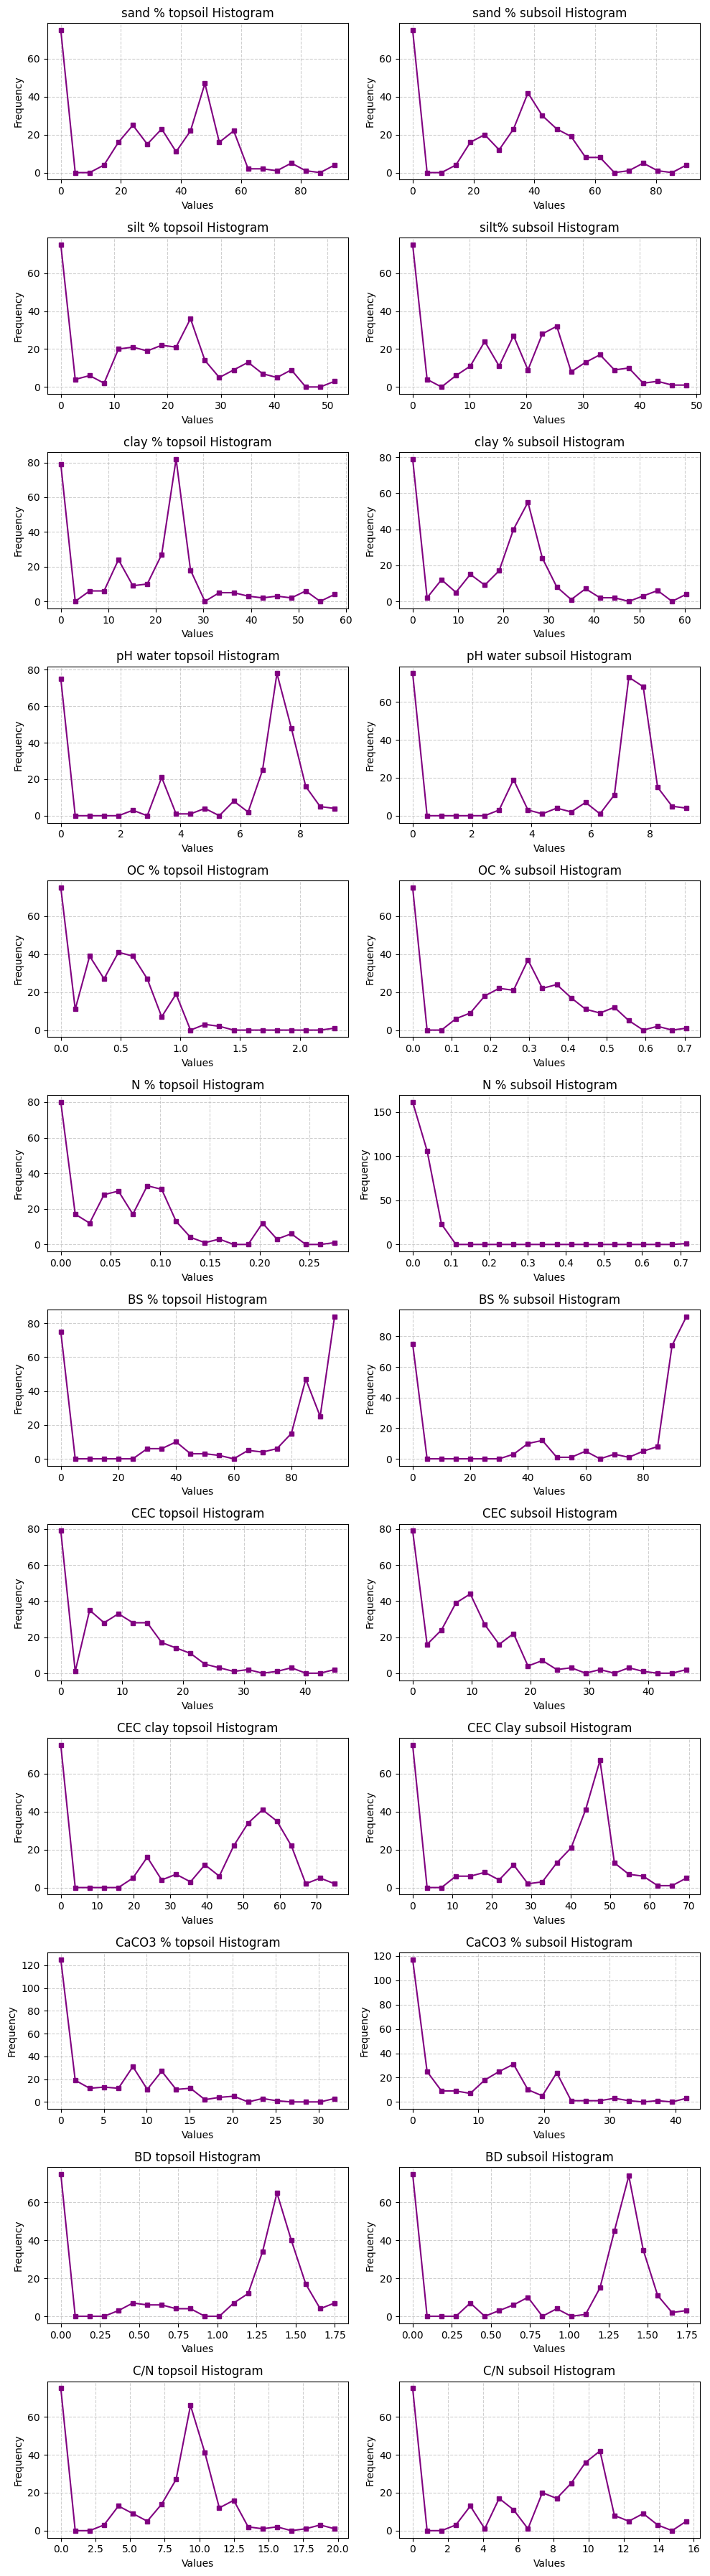

In [22]:
import os


attributes = [
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil'
]

num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "histograms"
os.makedirs(output_folder, exist_ok=True)


for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols

    histogram(attribute, soil_gdf[attribute].values, ax=axes[row, col], bins=20, color='purple', marker='s', line_style='-', marker_size=4, save_folder=output_folder)

plt.tight_layout()
plt.show()

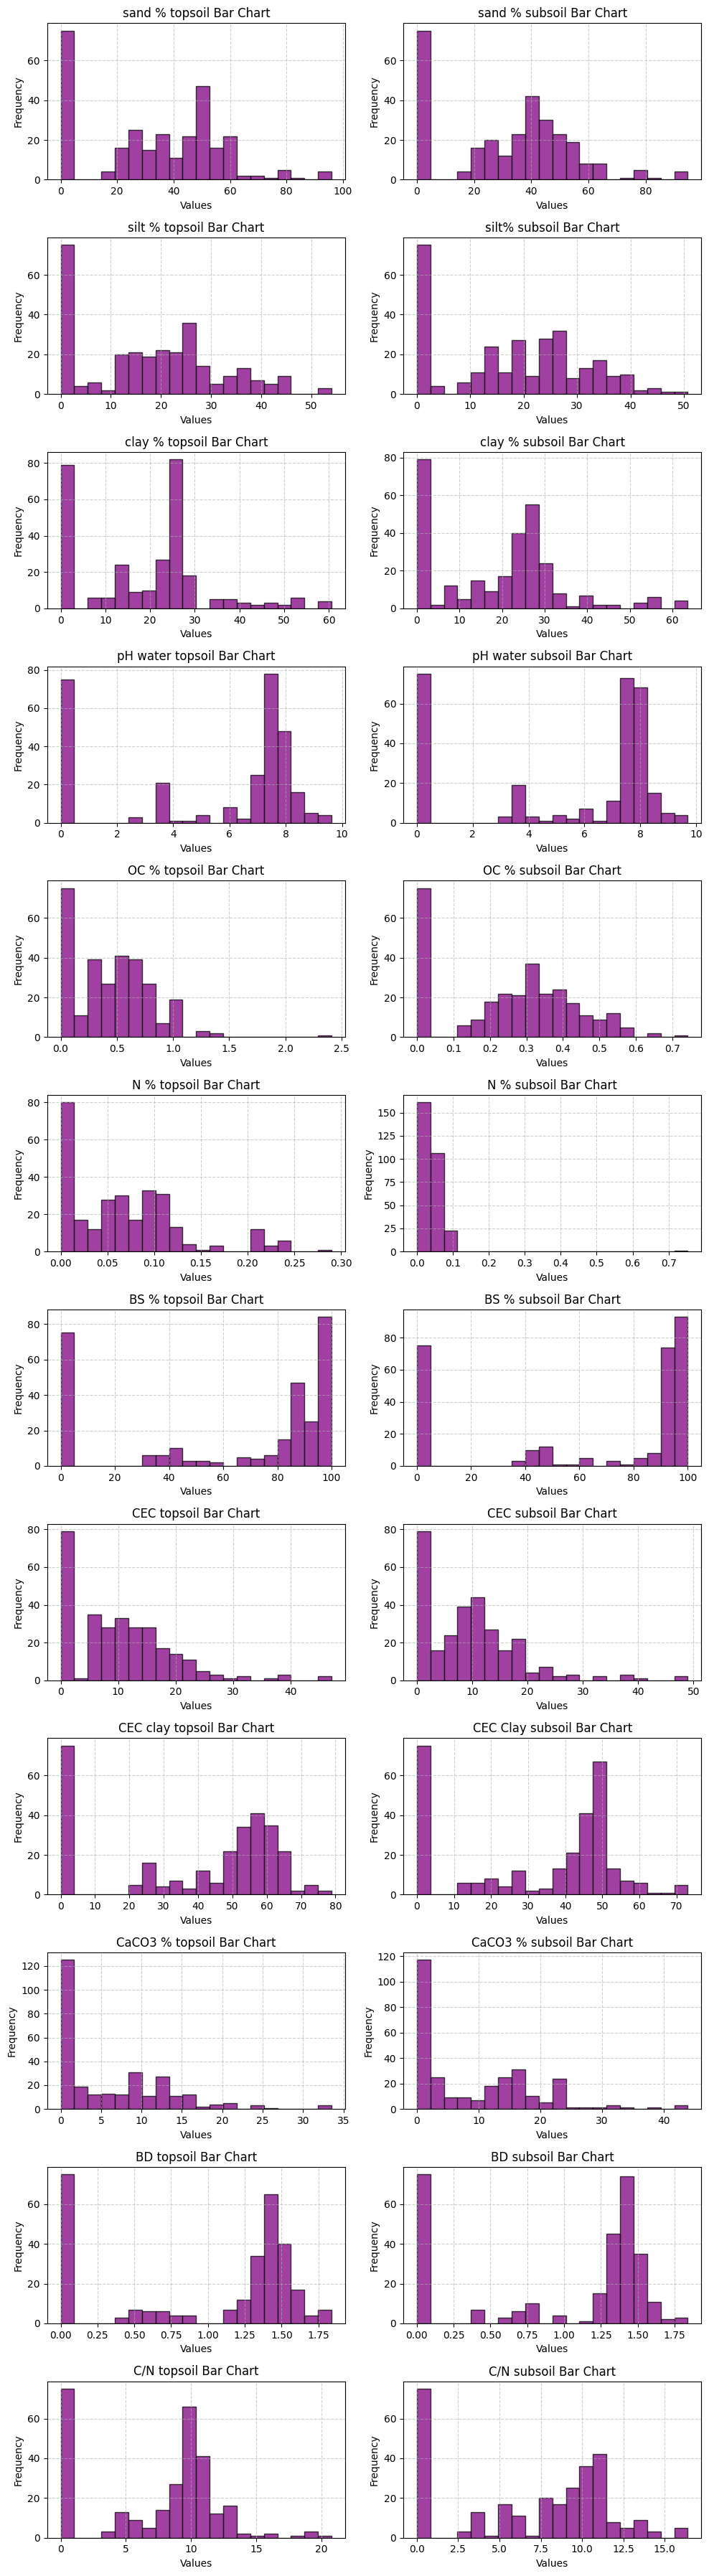

In [38]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "barcharts"
os.makedirs(output_folder, exist_ok=True)

# Generate bar charts for each attribute
for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols

    # Display the bar chart in the grid
    bar_chart(attribute, soil_gdf[attribute].values, ax=axes[row, col], bins=20, color='purple', edgecolor='k', save_folder=output_folder)

plt.tight_layout()
plt.show()

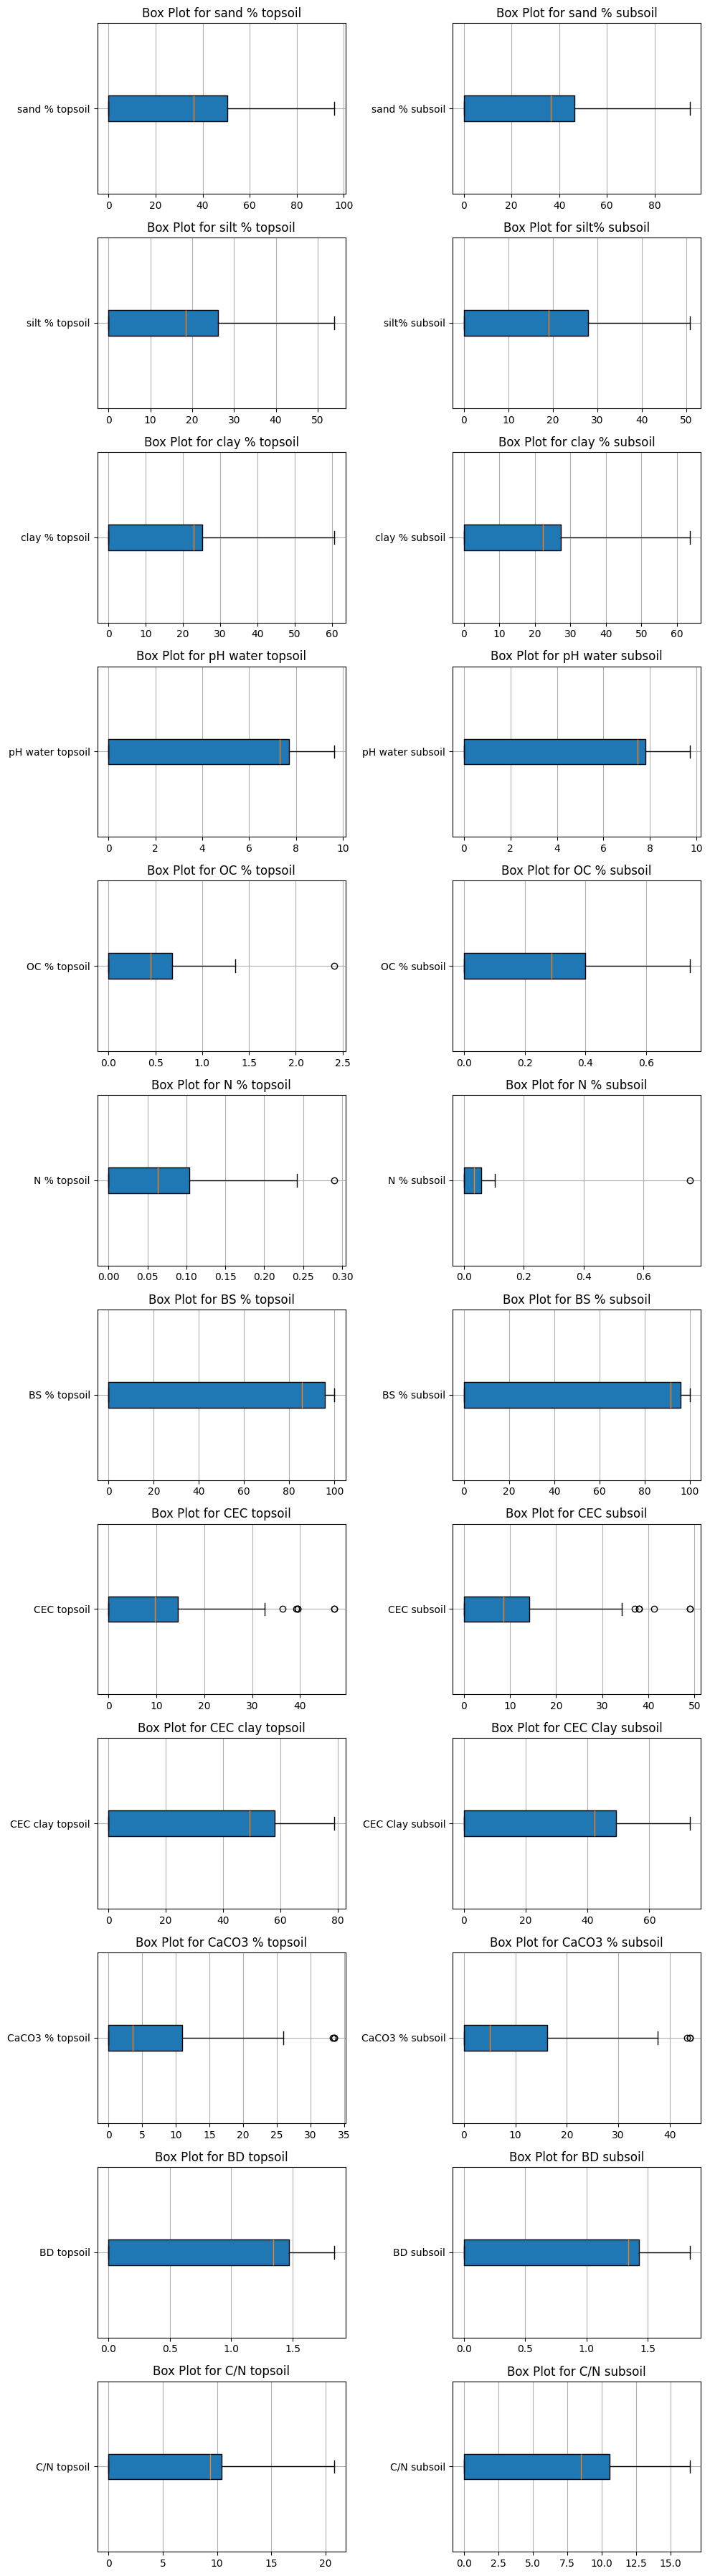

In [40]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "boxplots"
os.makedirs(output_folder, exist_ok=True)


for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols
    generate_box_plot(soil_gdf[attribute], attribute, ax=axes[row, col], show_outliers=True, save_folder=output_folder)

plt.tight_layout()
plt.show()

Climate attributes

In [41]:
climate_numerical_cols = climate_gdf.select_dtypes(include=[np.number]).columns
climate_non_numerical_cols = climate_gdf.select_dtypes(exclude=[np.number]).columns
print(climate_numerical_cols)
print(climate_non_numerical_cols)

Index(['lon', 'lat', 'spatial_ref', 'PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair',
       'Wind'],
      dtype='object')
Index(['time', 'geometry'], dtype='object')


In [43]:

results = []

# List of attributes
attributes = ['lon', 'lat', 'PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind']

# Iterate over each attribute
for attribute in attributes:
    # Calculate tendencies (mean, median, mode)
    tendencies = calculate_tendencies(climate_gdf, attribute)
    mean_val = tendencies[0]
    median_val = tendencies[1]
    mode_val = tendencies[2]
    
    # Calculate outliers (Q1, Q3, IQR, presence of outliers)
    outliers_data = outliers(climate_gdf, attribute)
    Q1, Q3, IQR, outliers_df = outliers_data
    has_outliers = not outliers_df.empty
    
    # Calculate missing and unique values
    missing_vals, unique_vals = missing_unique_values(climate_gdf, attribute)
    
    # Append results for this attribute to the list
    results.append({
        "Attribute": attribute,
        "Mean": mean_val,
        "Median": median_val,
        "Mode": ', '.join(map(str, mode_val)) if isinstance(mode_val, list) else mode_val,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Has Outliers": "Yes" if has_outliers else "No",
        "Missing Values": missing_vals,
        "Unique Values": unique_vals
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("climate_attributes_summary.csv", index=False, sep=';')
print("Results saved to climate_attributes_summary.csv")

results_df

Results saved to climate_attributes_summary.csv


,Attribute,Mean,Median,Mode,Q1,Q3,IQR,Has Outliers,Missing Values,Unique Values
0,lon,1.750000e+00,1.750000,"-8.25, -7.75, -7.25, -6.75, -6.25, -5.75, -5.2...",-3.250000,6.750000,10.000000,No,0,41
1,lat,2.800000e+01,28.000000,"19.25, 19.75, 20.25, 20.75, 21.25, 21.75, 22.2...",23.625000,32.375000,8.750000,No,0,36
2,PSurf,9.487716e+04,95569.117188,97212.2578125,93079.195312,97283.812500,4204.617188,Yes,5431200,1770194
3,Qair,4.690343e-03,0.004132,"0.003966310992836952, 0.004317568149417639",0.002996,0.005816,0.002820,Yes,5431200,6075571
4,Rainf,2.350112e-06,0.000000,0.0,0.000000,0.000000,0.000000,Yes,5431200,144365
5,Snowf,3.864786e-08,0.000000,0.0,0.000000,0.000000,0.000000,Yes,5431200,3812
6,Tair,2.964559e+02,296.686310,300.2471923828125,288.702972,303.969948,15.266975,Yes,5431200,1418678
7,Wind,4.043839e+00,3.779118,4.110576152801514,2.645402,5.162067,2.516665,Yes,5431200,6312312


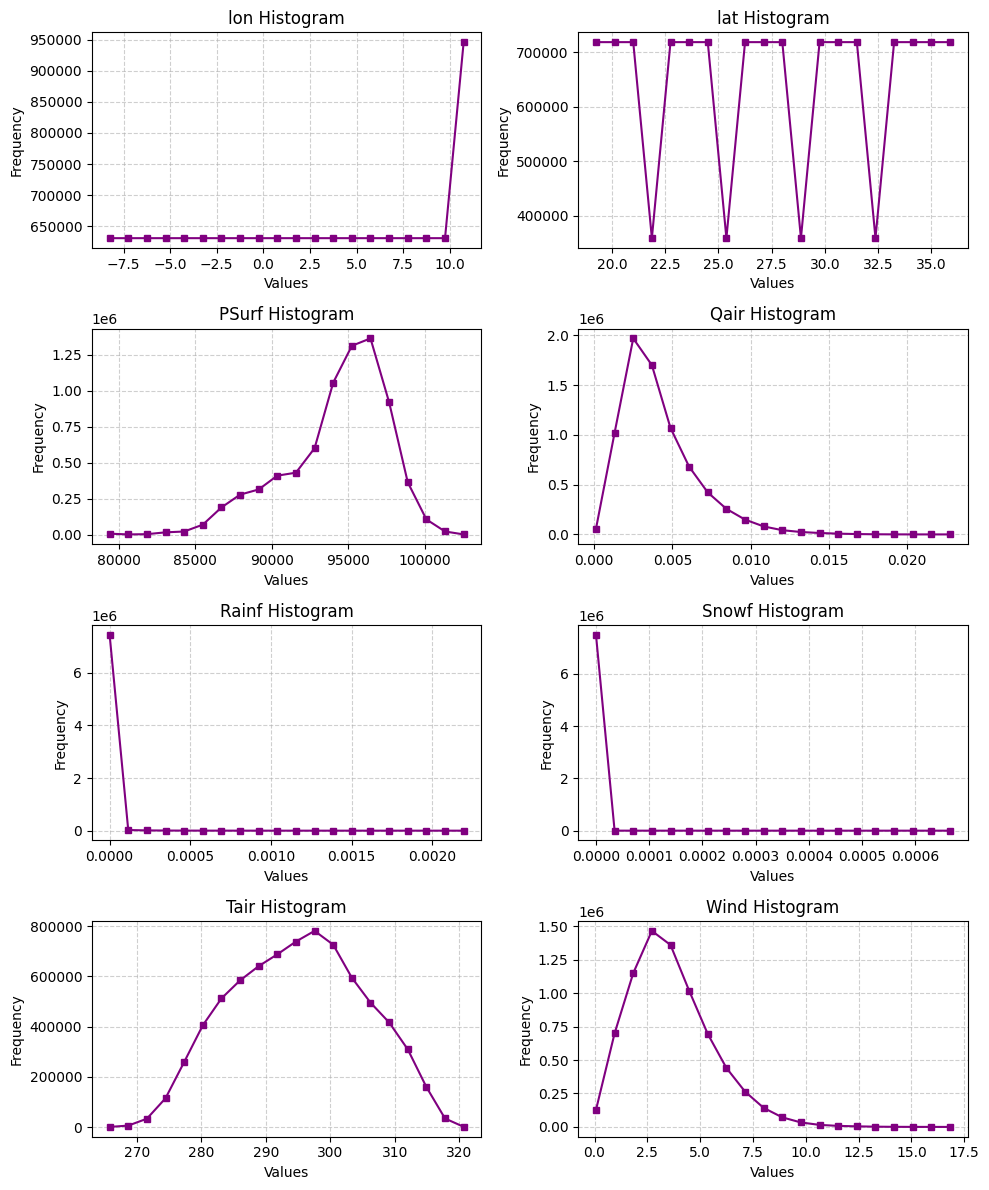

In [44]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "histograms"
os.makedirs(output_folder, exist_ok=True)


for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols

    histogram(attribute, climate_gdf[attribute].values, ax=axes[row, col], bins=20, color='purple', marker='s', line_style='-', marker_size=4, save_folder=output_folder)

plt.tight_layout()
plt.show()

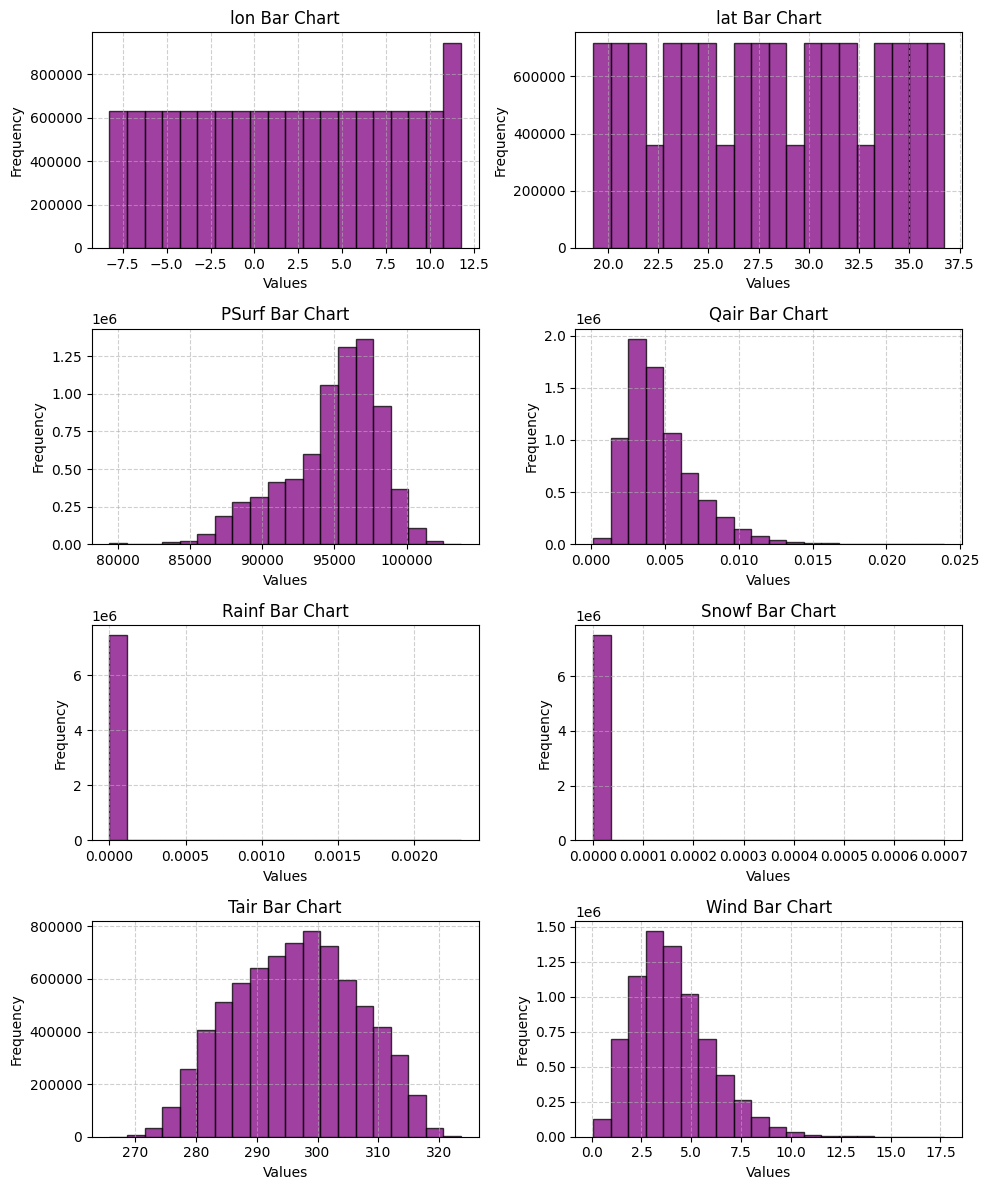

In [45]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "barcharts"
os.makedirs(output_folder, exist_ok=True)

# Generate bar charts for each attribute
for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols

    # Display the bar chart in the grid
    bar_chart(attribute, climate_gdf[attribute].values, ax=axes[row, col], bins=20, color='purple', edgecolor='k', save_folder=output_folder)

plt.tight_layout()
plt.show()

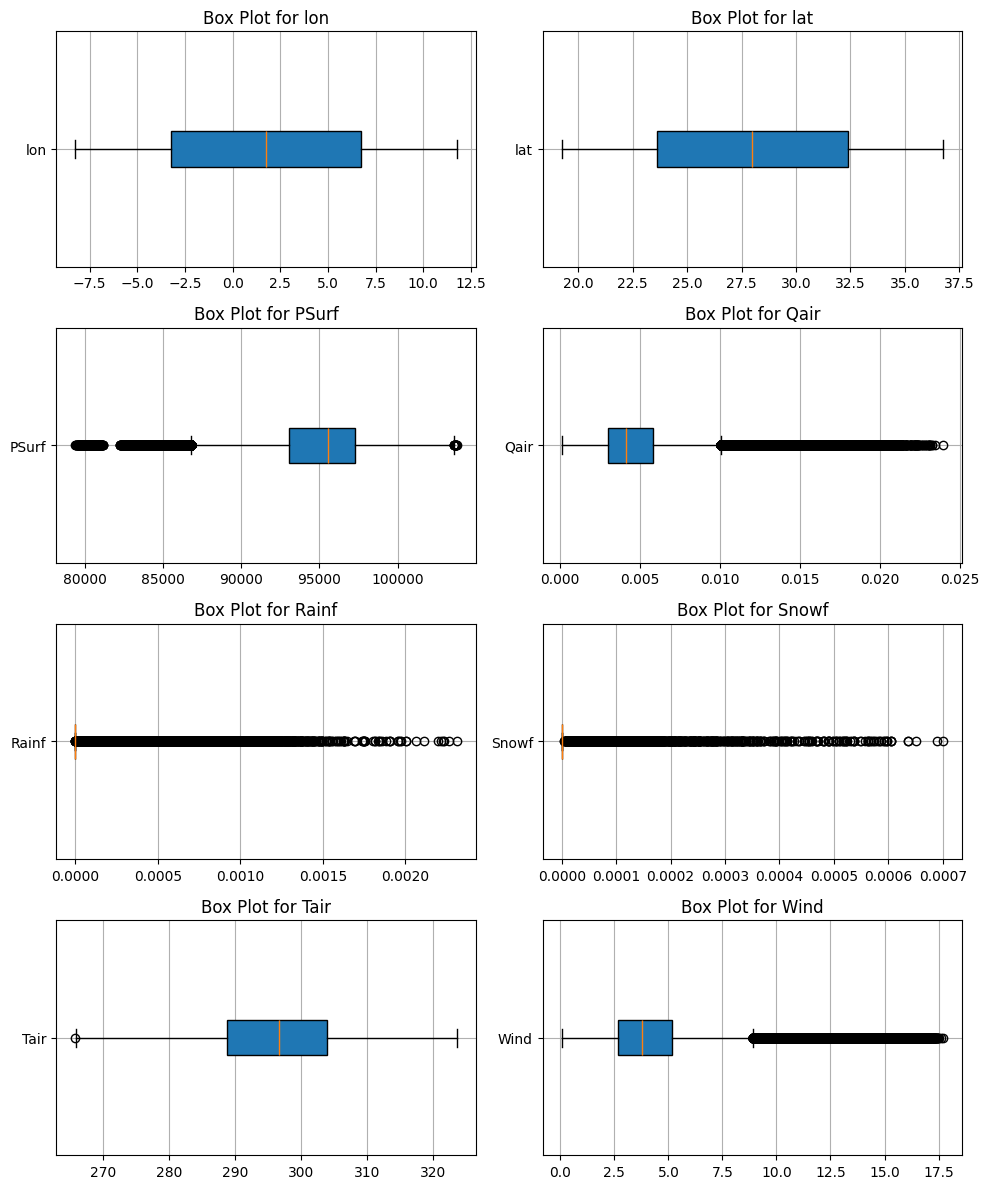

In [46]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "boxplots"
os.makedirs(output_folder, exist_ok=True)


for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols
    generate_box_plot(climate_gdf[attribute], attribute, ax=axes[row, col], show_outliers=True, save_folder=output_folder)

plt.tight_layout()
plt.show()

Data integration , Data reduction , Normalization  and Discretization 

In [2]:
def data_integration(soil_gdf,climate_gdf):

    merged_gdf = gpd.sjoin(climate_gdf, soil_gdf, how="inner", predicate="within")

    return merged_gdf

In [3]:
def data_reduction(df):
   
    df['time'] = pd.to_datetime(df['time'])
    
    df['month'] = df['time'].dt.month

    df_climate_winter = df[df['month'].isin([12, 1, 2])]
    df_climate_spring = df[df['month'].isin([3, 4, 5])]
    df_climate_summer = df[df['month'].isin([6, 7, 8])]
    df_climate_autumn = df[df['month'].isin([9, 10, 11])]

    return df_climate_winter, df_climate_spring, df_climate_summer, df_climate_autumn

In [27]:
import math
import pandas as pd
import numpy as np

def handling_outliers(df, soil_attributes, climate_attributes, choice, soil_bins=3, climate_bins=10):
 
    binned_df = df.copy()
    
    # Helper function to bin attributes based on the choice and number of bins
    def bin_attribute(attribute, bins_count, method):
        if df[attribute].dropna().empty:
            print(f"Warning: No valid values to create bins for {attribute}.")
            return
        
        try:
            if method == 'Equal Frequency Binning':
                binned_df[attribute + "_equal_frequency_binned"] = pd.qcut(
                    df[attribute],
                    q=bins_count,
                    duplicates='drop'
                )
                print(f"Binning {attribute}: {binned_df[attribute + '_equal_frequency_binned'].value_counts()}")

            elif method == 'Binning by Mean':
                bins = pd.qcut(df[attribute], q=bins_count, duplicates='drop')
                bin_means = df.groupby(bins)[attribute].mean()
                binned_df[attribute + "_mean_binned"] = bins.map(bin_means)
                print(f"Binning {attribute}: {binned_df[attribute + '_mean_binned'].value_counts()}")

            elif method == 'Binning by Median':
                bins = pd.qcut(df[attribute], q=bins_count, duplicates='drop')
                bin_medians = df.groupby(bins)[attribute].median()
                binned_df[attribute + "_median_binned"] = bins.map(bin_medians)
                print(f"Binning {attribute}: {binned_df[attribute + '_median_binned'].value_counts()}")

            elif method == 'Interval Binning':
                interval_size = (df[attribute].max() - df[attribute].min()) / bins_count
                binned_df[attribute + "_interval_binned"] = pd.cut(
                    df[attribute],
                    bins=np.arange(df[attribute].min(), df[attribute].max() + interval_size, interval_size),
                    include_lowest=True
                )
                print(f"Binning {attribute}: {binned_df[attribute + '_interval_binned'].value_counts()}")

        except ValueError:
            print(f"Warning: Could not bin {attribute}. Insufficient unique values.")

    # Apply binning for soil attributes with soil_bins
    for attribute in soil_attributes:
        bin_attribute(attribute, soil_bins, choice)

    # Apply binning for climate attributes with climate_bins
    for attribute in climate_attributes:
        bin_attribute(attribute, climate_bins, choice)

    return binned_df


In [31]:
import numpy as np

def handle_outliers(df, columns, strategy='mean'):

    df_cleaned = df.copy()
    
    for column_name in columns:
      
        if df_cleaned[column_name].dtype not in ['float64', 'int64']:
            continue

       
        column_data = df_cleaned[column_name]
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identifying outliers
        outliers = (column_data < lower_bound) | (column_data > upper_bound)

       
        if strategy == 'mean':
            replacement_value = column_data.mean()
        elif strategy == 'median':
            replacement_value = column_data.median()
        elif strategy == 'mode':
            replacement_value = column_data.mode()[0] # taking the fisrt value because mode can return multiple values 
        elif strategy == 'quantile':
           
            df_cleaned.loc[column_data < lower_bound, column_name] = q1
            df_cleaned.loc[column_data > upper_bound, column_name] = q3
            continue  
        elif strategy == 'cap':
           
            df_cleaned.loc[column_data < lower_bound, column_name] = lower_bound
            df_cleaned.loc[column_data > upper_bound, column_name] = upper_bound
            continue
        elif strategy == 'random':
           
            replacement_value = np.random.uniform(q1, q3, size=len(df_cleaned[outliers]))
            df_cleaned.loc[outliers, column_name] = replacement_value
            continue
        else:
            raise ValueError("Invalid strategy. Choose from 'mean', 'median', 'mode', 'quantile', 'cap', or 'random'.")

        
        df_cleaned.loc[outliers, column_name] = replacement_value
    
    return df_cleaned


In [5]:
def handling_missing_values(df, attributes, choice):
    updated_df = df.copy()

    match choice:
        case 'Ignore the Nan values':
            updated_df.dropna(axis=0, inplace=True)
            return updated_df
        
        case 'Replace by Mean':
            for attribute in attributes:
                updated_df[attribute] = updated_df[attribute].fillna(updated_df[attribute].mean())
            return updated_df

        case 'Replace by Median':
            for attribute in attributes:
                updated_df[attribute] = updated_df[attribute].fillna(updated_df[attribute].median())
            return updated_df
        
        case 'Replace using Bayes Formula':
            for attribute in attributes:
                
                if attribute in updated_df.columns:
                    
                    overall_mean = updated_df[attribute].mean()
                    overall_std = updated_df[attribute].std()

                    
                    nan_indices = updated_df[updated_df[attribute].isna()].index
                    
                    
                    updated_df.loc[nan_indices, attribute] = np.random.normal(loc=overall_mean, scale=overall_std, size=len(nan_indices))

            return updated_df



In [57]:
def min_max_normalization(df, attributes,epsilon=1e-6):
    
    normalized_df = df.copy() 
    
    for attribute in attributes:
        min_value = df[attribute].dropna().min()
        max_value = df[attribute].dropna().max()
        range_value = max_value - min_value + epsilon  

        if max_value != min_value: 
            normalized_df[attribute + "_normalized"] = (df[attribute] - min_value) / range_value
        else:
            normalized_df[attribute + "_normalized"] = df[attribute] 
       
    
    return normalized_df

In [7]:
def z_score_normalization(df, attributes):
    normalized_df = df.copy() 

    for attribute in attributes:
        mean_value = df[attribute].mean()
        std_dev = df[attribute].std()  
        
        if std_dev == 0:
            normalized_df[attribute + "_normalized"] = normalized_df[attribute]  
        else:
            normalized_df[attribute + "_normalized"] = (df[attribute] - mean_value) / std_dev
    
    return normalized_df

In [8]:
def discretize_equal_frequency(df, attributes, Q):
    df_discretized = df.copy()
    
    for attribute in attributes:
        
        quantiles = np.quantile(df_discretized[attribute].dropna(), np.linspace(0, 1, Q + 1))
        print(f"Quantiles for {attribute}:", quantiles)  
        
        try:
            
            df_discretized[attribute + '_discretized'] = pd.cut(
                df_discretized[attribute], bins=quantiles, labels=False, include_lowest=True, duplicates='drop'
            )
        except ValueError as e:
            print(f"Error discretizing {attribute}: {e}")
            continue  
    
    return df_discretized


In [9]:
from sklearn.feature_selection import VarianceThreshold

def data_reduction_v_h(df,choice):

   
   df_reduced = df.select_dtypes(include=['float64'])

   match choice:
        case 'Horizontal':
            df_reduced = df_reduced.drop_duplicates()
            return df_reduced
        
        case 'Low Variance Columns':
                       
            selector = VarianceThreshold(threshold=0.01)
            reduced_array = selector.fit_transform(df_reduced)
            df_reduced = pd.DataFrame(reduced_array, columns=df_reduced.columns[selector.get_support()])
            return df_reduced
         
        
        case 'Correlation-Based Removal':
           correlation_matrix = df_reduced.corr().abs()
           upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
           
           columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
           df_reduced = df_reduced.drop(columns=columns_to_drop)
           return df_reduced

       
     

In [ ]:
import geopandas as gpd
soil_gdf = gpd.read_file("soil_data.gpkg")  
climate_gdf = gpd.read_file("final_climate_data.gpkg")


In [ ]:
print(soil_gdf.info())
print(climate_gdf.info())

In [11]:
final_merged_data = data_integration(soil_gdf,climate_gdf)
print(final_merged_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1181904 entries, 744 to 2094215
Data columns (total 36 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   time              1181904 non-null  datetime64[ms]
 1   PSurf             196368 non-null   float32       
 2   Qair              196584 non-null   float32       
 3   Rainf             200712 non-null   float32       
 4   Snowf             204984 non-null   float32       
 5   Tair              185472 non-null   float32       
 6   Wind              197784 non-null   float32       
 7   lon               1181904 non-null  float64       
 8   lat               1181904 non-null  float64       
 9   geometry          1181904 non-null  geometry      
 10  index_right       1181904 non-null  int64         
 11  CNT_FULLNAME      1181904 non-null  object        
 12  sand % topsoil    1181904 non-null  float64       
 13  sand % subsoil    1181904 non-null  f

In [ ]:
final_merged_data.head()

In [12]:
df_climate_winter, df_climate_spring, df_climate_summer, df_climate_autumn = data_reduction(final_merged_data)
print(df_climate_winter.info())
print(df_climate_spring.info())
print(df_climate_summer.info())
print(df_climate_autumn.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 294720 entries, 744 to 2094215
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              294720 non-null  datetime64[ms]
 1   PSurf             51096 non-null   float32       
 2   Qair              51984 non-null   float32       
 3   Rainf             46704 non-null   float32       
 4   Snowf             51984 non-null   float32       
 5   Tair              45504 non-null   float32       
 6   Wind              47448 non-null   float32       
 7   lon               294720 non-null  float64       
 8   lat               294720 non-null  float64       
 9   geometry          294720 non-null  geometry      
 10  index_right       294720 non-null  int64         
 11  CNT_FULLNAME      294720 non-null  object        
 12  sand % topsoil    294720 non-null  float64       
 13  sand % subsoil    294720 non-null  float64       
 14

In [13]:
attributes = ['PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind', 'lon', 'lat',
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil']

In [36]:
def detect_outliers_iqr(df, columns):
    outliers_summary = {}
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
    
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
      
        outliers_summary[column] = len(outliers)
        print(f"{column}: {len(outliers)} outliers detected")
    
    return outliers_summary

In [43]:
winter_mean_cleaned_outliers_df = handle_outliers(df_climate_winter, attributes, strategy='mean')
outliers_summary = detect_outliers_iqr(winter_mean_cleaned_outliers_df, attributes)

PSurf: 0 outliers detected
Qair: 6 outliers detected
Rainf: 9653 outliers detected
Snowf: 379 outliers detected
Tair: 0 outliers detected
Wind: 2725 outliers detected
lon: 0 outliers detected
lat: 0 outliers detected
sand % topsoil: 0 outliers detected
sand % subsoil: 0 outliers detected
silt % topsoil: 0 outliers detected
silt% subsoil: 0 outliers detected
clay % topsoil: 0 outliers detected
clay % subsoil: 0 outliers detected
pH water topsoil: 0 outliers detected
pH water subsoil: 0 outliers detected
OC % topsoil: 0 outliers detected
OC % subsoil: 0 outliers detected
N % topsoil: 0 outliers detected
N % subsoil: 0 outliers detected
BS % topsoil: 0 outliers detected
BS % subsoil: 0 outliers detected
CEC topsoil: 0 outliers detected
CEC subsoil: 0 outliers detected
CEC clay topsoil: 0 outliers detected
CEC Clay subsoil: 0 outliers detected
CaCO3 % topsoil: 0 outliers detected
CaCO3 % subsoil: 0 outliers detected
BD topsoil: 0 outliers detected
BD subsoil: 0 outliers detected
C/N topsoi

In [ ]:
winter_mode_cleaned_outliers_df = handle_outliers(df_climate_winter, attributes, strategy='mode')
outliers_summary = detect_outliers_iqr(winter_mode_cleaned_outliers_df, attributes)

In [ ]:
winter_median_cleaned_outliers_df = handle_outliers(df_climate_winter, attributes, strategy='median')
outliers_summary = detect_outliers_iqr(winter_median_cleaned_outliers_df, attributes)

In [ ]:
winter_quantile_cleaned_outliers_df = handle_outliers(df_climate_winter, attributes, strategy='quantile')
outliers_summary = detect_outliers_iqr(winter_quantile_cleaned_outliers_df, attributes)

In [ ]:
winter_cap_cleaned_outliers_df = handle_outliers(df_climate_winter, attributes, strategy='cap')
outliers_summary = detect_outliers_iqr(winter_cap_cleaned_outliers_df, attributes)

In [ ]:
winter_random_cleaned_outliers_df = handle_outliers(df_climate_winter, attributes, strategy='random')
outliers_summary = detect_outliers_iqr(winter_random_cleaned_outliers_df, attributes)


In [ ]:
'''the winter_mean_cleaned_outliers_df  was retained for the 
following steps beacuse all startegies gave the same result '''

In [49]:
deleted_nan_winter_df = handling_missing_values(winter_mean_cleaned_outliers_df, attributes, 'Ignore the Nan values')
print(deleted_nan_winter_df.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 0 entries
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              0 non-null      datetime64[ms]
 1   PSurf             0 non-null      float32       
 2   Qair              0 non-null      float32       
 3   Rainf             0 non-null      float32       
 4   Snowf             0 non-null      float32       
 5   Tair              0 non-null      float32       
 6   Wind              0 non-null      float32       
 7   lon               0 non-null      float64       
 8   lat               0 non-null      float64       
 9   geometry          0 non-null      geometry      
 10  index_right       0 non-null      int64         
 11  CNT_FULLNAME      0 non-null      object        
 12  sand % topsoil    0 non-null      float64       
 13  sand % subsoil    0 non-null      float64       
 14  silt % topsoil    0 non-null      f

In [51]:
replaced_nan_mean_winter_df = handling_missing_values(winter_mean_cleaned_outliers_df, attributes, 'Replace by Mean')
print(replaced_nan_mean_winter_df.info())
print(replaced_nan_mean_winter_df.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 294720 entries, 744 to 2094215
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              294720 non-null  datetime64[ms]
 1   PSurf             294720 non-null  float32       
 2   Qair              294720 non-null  float32       
 3   Rainf             294720 non-null  float32       
 4   Snowf             294720 non-null  float32       
 5   Tair              294720 non-null  float32       
 6   Wind              294720 non-null  float32       
 7   lon               294720 non-null  float64       
 8   lat               294720 non-null  float64       
 9   geometry          294720 non-null  geometry      
 10  index_right       294720 non-null  int64         
 11  CNT_FULLNAME      294720 non-null  object        
 12  sand % topsoil    294720 non-null  float64       
 13  sand % subsoil    294720 non-null  float64       
 14

In [52]:
replaced_nan_median_winter_df = handling_missing_values(winter_mean_cleaned_outliers_df, attributes, 'Replace by Median')
print(replaced_nan_median_winter_df.info())
print(replaced_nan_median_winter_df.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 294720 entries, 744 to 2094215
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              294720 non-null  datetime64[ms]
 1   PSurf             294720 non-null  float32       
 2   Qair              294720 non-null  float32       
 3   Rainf             294720 non-null  float32       
 4   Snowf             294720 non-null  float32       
 5   Tair              294720 non-null  float32       
 6   Wind              294720 non-null  float32       
 7   lon               294720 non-null  float64       
 8   lat               294720 non-null  float64       
 9   geometry          294720 non-null  geometry      
 10  index_right       294720 non-null  int64         
 11  CNT_FULLNAME      294720 non-null  object        
 12  sand % topsoil    294720 non-null  float64       
 13  sand % subsoil    294720 non-null  float64       
 14

In [53]:
replaced_nan_bayes_winter_df = handling_missing_values(winter_mean_cleaned_outliers_df, attributes, 'Replace using Bayes Formula')
print(replaced_nan_bayes_winter_df.info())
print(replaced_nan_bayes_winter_df.head())

C:\Users\Dell\AppData\Local\Temp\ipykernel_9860\805681117.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 98398.5653295   97474.2267601   99155.41653867 ...  98760.94021243
 101045.61659439  99102.40074276]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  updated_df.loc[nan_indices, attribute] = np.random.normal(loc=overall_mean, scale=overall_std, size=len(nan_indices))
C:\Users\Dell\AppData\Local\Temp\ipykernel_9860\805681117.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.00541862 0.00680578 0.00390286 ... 0.00576609 0.00753811 0.00569515]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  updated_df.loc[nan_indices, attribute] = np.random.normal(loc=overall_mean, scale=overall_std, size=len(nan_indices))
C:\Users\Dell\App

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 294720 entries, 744 to 2094215
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              294720 non-null  datetime64[ms]
 1   PSurf             294720 non-null  float64       
 2   Qair              294720 non-null  float64       
 3   Rainf             294720 non-null  float64       
 4   Snowf             294720 non-null  float64       
 5   Tair              294720 non-null  float64       
 6   Wind              294720 non-null  float64       
 7   lon               294720 non-null  float64       
 8   lat               294720 non-null  float64       
 9   geometry          294720 non-null  geometry      
 10  index_right       294720 non-null  int64         
 11  CNT_FULLNAME      294720 non-null  object        
 12  sand % topsoil    294720 non-null  float64       
 13  sand % subsoil    294720 non-null  float64       
 14

In [ ]:
# replaced_nan_median_winter_df was used for the following steps to  minimize the impact of remaining outliers

In [56]:
def check_variance(df, attributes, threshold=0.01):
    low_variance_attrs = []
    for attribute in attributes:
        if df[attribute].dropna().std() <= threshold:
            low_variance_attrs.append(attribute)
    return low_variance_attrs


low_variance_attrs= check_variance(replaced_nan_median_winter_df,attributes)
low_variance_attrs

['Qair', 'Rainf', 'Snowf', 'lat', 'N % subsoil']

In [59]:
min_max_normalized_winter_df = min_max_normalization(replaced_nan_median_winter_df, attributes)
print(min_max_normalized_winter_df.info())
print(min_max_normalized_winter_df.head(20))

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 294720 entries, 744 to 2094215
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   time                         294720 non-null  datetime64[ms]
 1   PSurf                        294720 non-null  float32       
 2   Qair                         294720 non-null  float32       
 3   Rainf                        294720 non-null  float32       
 4   Snowf                        294720 non-null  float32       
 5   Tair                         294720 non-null  float32       
 6   Wind                         294720 non-null  float32       
 7   lon                          294720 non-null  float64       
 8   lat                          294720 non-null  float64       
 9   geometry                     294720 non-null  geometry      
 10  index_right                  294720 non-null  int64         
 11  CNT_FULLNAME        

In [60]:
z_score_normalized_winter_df = z_score_normalization(replaced_nan_median_winter_df, attributes)
print(z_score_normalized_winter_df.info())
print(z_score_normalized_winter_df.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 294720 entries, 744 to 2094215
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   time                         294720 non-null  datetime64[ms]
 1   PSurf                        294720 non-null  float32       
 2   Qair                         294720 non-null  float32       
 3   Rainf                        294720 non-null  float32       
 4   Snowf                        294720 non-null  float32       
 5   Tair                         294720 non-null  float32       
 6   Wind                         294720 non-null  float32       
 7   lon                          294720 non-null  float64       
 8   lat                          294720 non-null  float64       
 9   geometry                     294720 non-null  geometry      
 10  index_right                  294720 non-null  int64         
 11  CNT_FULLNAME        

In [62]:
discretized_equal_frequency_winter_df = discretize_equal_frequency(z_score_normalized_winter_df, attributes,10)
print(discretized_equal_frequency_winter_df.head())

Quantiles for PSurf: [ 94630.9453125  98696.8828125  98696.8828125  98696.8828125
  98696.8828125  98696.8828125  98696.8828125  98696.8828125
  98696.8828125  98696.8828125 100682.6484375]
Quantiles for Qair: [0.00334531 0.00602474 0.00602474 0.00602474 0.00602474 0.00602474
 0.00602474 0.00602474 0.00602474 0.00602474 0.00989771]
Quantiles for Rainf: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00056081]
Quantiles for Snowf: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00016311]
Quantiles for Tair: [273.90579224 283.62756348 283.62756348 283.62756348 283.62756348
 283.62756348 283.62756348 283.62756348 283.62756348 283.62756348
 294.39700317]
Quantiles for Wind: [0.21815796 2.54253721 2.54253721 2.54253721 2.54253721 2.54253721
 2.54253721 2.54253721 2.54253721 2.54253721 9.79049587]
Quantiles for lon: [3.75 3.75 3.75 3.75 3.75 3.75 3.75 4.25 4.25 4.25 4.75]
Quant

In [63]:
reduced_horizontal_winter_df = data_reduction_v_h(discretized_equal_frequency_winter_df,'Horizontal')
print(reduced_horizontal_winter_df.info())
print(reduced_horizontal_winter_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 744 to 2976
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lon                          3 non-null      float64
 1   lat                          3 non-null      float64
 2   sand % topsoil               3 non-null      float64
 3   sand % subsoil               3 non-null      float64
 4   silt % topsoil               3 non-null      float64
 5   silt% subsoil                3 non-null      float64
 6   clay % topsoil               3 non-null      float64
 7   clay % subsoil               3 non-null      float64
 8   pH water topsoil             3 non-null      float64
 9   pH water subsoil             3 non-null      float64
 10  OC % topsoil                 3 non-null      float64
 11  OC % subsoil                 3 non-null      float64
 12  N % topsoil                  3 non-null      float64
 13  N % subsoil             

In [64]:
reduced_lvar_winter_df = data_reduction_v_h(discretized_equal_frequency_winter_df,'Low Variance Columns')
print(reduced_lvar_winter_df.info())
print(reduced_lvar_winter_df.head())

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294720 entries, 0 to 294719
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   lon                          294720 non-null  float64
 1   sand % topsoil               294720 non-null  float64
 2   sand % subsoil               294720 non-null  float64
 3   silt % topsoil               294720 non-null  float64
 4   silt% subsoil                294720 non-null  float64
 5   clay % topsoil               294720 non-null  float64
 6   clay % subsoil               294720 non-null  float64
 7   pH water subsoil             294720 non-null  float64
 8   BS % topsoil                 294720 non-null  float64
 9   BS % subsoil                 294720 non-null  float64
 10  CEC topsoil                  294720 non-null  float64
 11  CEC subsoil                  294720 non-null  float64
 12  CEC clay topsoil             294720 non-null  float64
 13 

In [65]:
reduced_correlation_rm_winter_df = data_reduction_v_h(discretized_equal_frequency_winter_df,'Correlation-Based Removal')
print(reduced_correlation_rm_winter_df.info())
print(reduced_correlation_rm_winter_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 294720 entries, 744 to 2094215
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lon              294720 non-null  float64
 1   lat              294720 non-null  float64
 2   lat_normalized   294720 non-null  float64
 3   lat_discretized  0 non-null       float64
dtypes: float64(4)
memory usage: 19.3 MB
None
      lon    lat  lat_normalized  lat_discretized
744  4.75  36.75           36.75              NaN
745  4.75  36.75           36.75              NaN
746  4.75  36.75           36.75              NaN
747  4.75  36.75           36.75              NaN
748  4.75  36.75           36.75              NaN
